In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

## First, read in your dataframe

In [2]:
data = pd.read_csv('findings_data.csv')

In [3]:
data.head()

,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size
0,1,1,Cardiomegaly|Emphysema,57,M,NaN
1,2,2,No Finding,77,M,NaN
2,3,3,Atelectasis,79,M,NaN
3,4,4,Cardiomegaly|Edema|Effusion,55,F,NaN
4,5,5,Consolidation|Mass,68,M,2516.0


### To understand distributions of variables as they relate to diseases, let's try splitting up the 'Finding Labels' column into one additional column per disease (e.g. one for 'Cardiomegaly', one for 'Emphysema', etc.) and put a binary flag in that column to indicate the presence of the disease

In [4]:
all_labels = np.unique(list(chain(*data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        data[c_label] = data['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
data.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
417,418,418,No Finding,55,F,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
509,510,510,No Finding,76,F,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
626,627,627,No Finding,45,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
## Now write your code here to visualize some of the distributions specified in the instructions

In [6]:
data[all_labels].sum()/len(data)

Atelectasis           0.093093
Cardiomegaly          0.038038
Consolidation         0.043043
Edema                 0.016016
Effusion              0.095095
Emphysema             0.018018
Fibrosis              0.027027
Infiltration          0.134134
Mass                  0.035035
No Finding            0.575576
Nodule                0.041041
Pleural_Thickening    0.032032
Pneumonia             0.006006
Pneumothorax          0.033033
dtype: float64

[Text(0, 0.5, 'Number of Images with Label')]

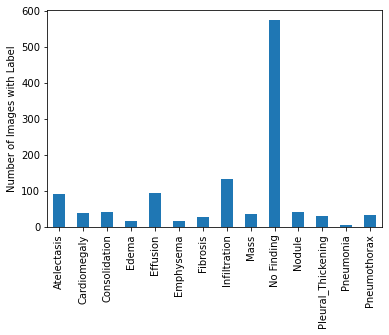

In [7]:
ax = data[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

<div align="justify">Above, I see the relative frequencies of each disease in my dataset. It looks like 'No Finding' is the most common occurrence. 'No Finding' can never appear with any other label by definition, so we know that in 57.5% of this dataset, there is no finding in the image. Beyond that, it appears that 'Infiltration' is the most common disease-related label, and it is followed by 'Effusion' and 'Atelectasis.'</div>
<br>
<div align="justify">Since 'Infiltration' is the most common, I'm going to now look at how frequently it appears with all of the other diseases:</div>

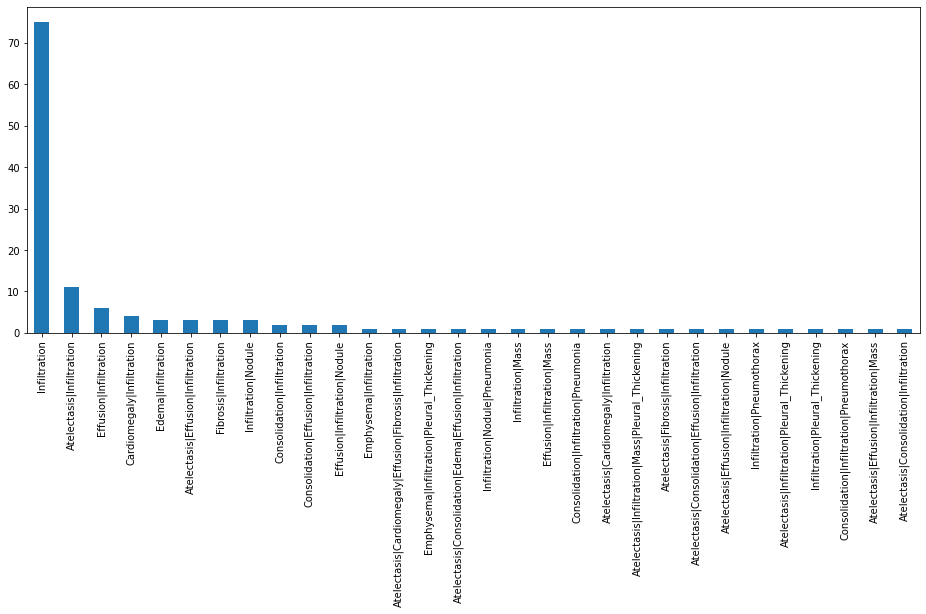

In [12]:
# Since there are many combinations of potential findings, I'm going to look at the 30 most common co-occurrences:
plt.figure(figsize = (16, 6))
data[data.Infiltration == 1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

It looks like Infiltration actually occurs alone for the most part, and that its most-common comorbidities are Atelectasis and Effusion.

Let's see if the same is true for another label, we'll try Effusion:

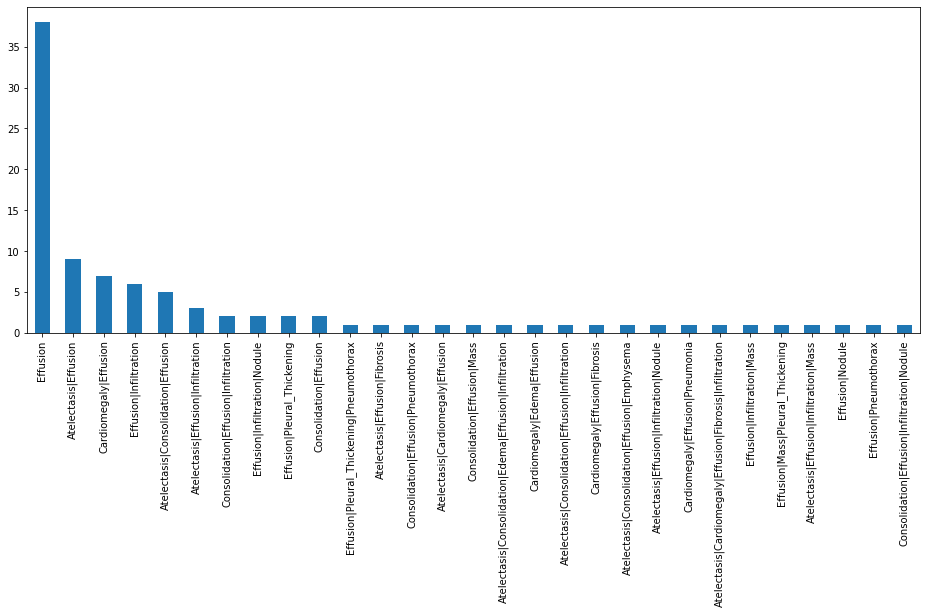

In [13]:
# Since there are many combinations of potential findings, I'm going to look at the 30 most common co-occurrences:
plt.figure(figsize = (16, 6))
data[data.Effusion == 1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

Same thing! Now let's move on to looking at age & gender:

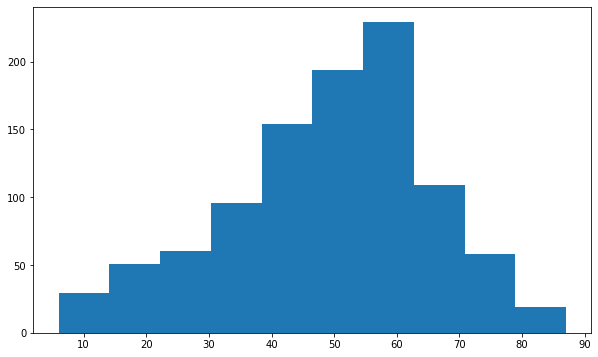

In [15]:
plt.figure(figsize = (10, 6))
plt.hist(data['Patient Age']);

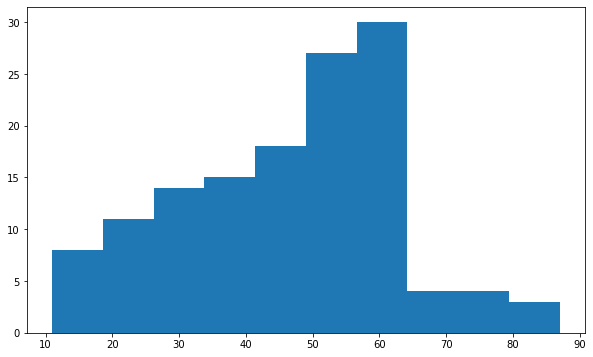

In [17]:
plt.figure(figsize=(10,6))
plt.hist(data[data.Infiltration==1]['Patient Age']);

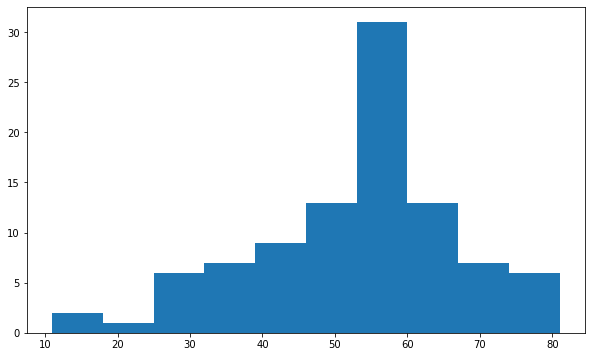

In [19]:
plt.figure(figsize=(10,6))
plt.hist(data[data.Effusion==1]['Patient Age']);

Looks like the distribution of age across the whole population is slightly different than it is specifically for Infiltration and Effusion. Infiltration appears to be more skewed towards younger individuals, and Effusion spans the age range but has a large peak around 55. 

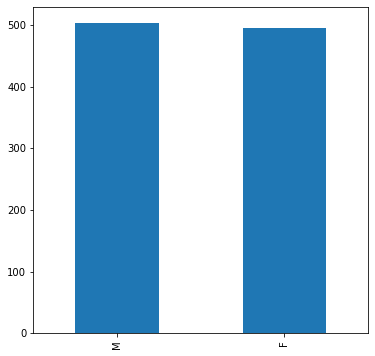

In [21]:
plt.figure(figsize=(6,6))
data['Patient Gender'].value_counts().plot(kind='bar');

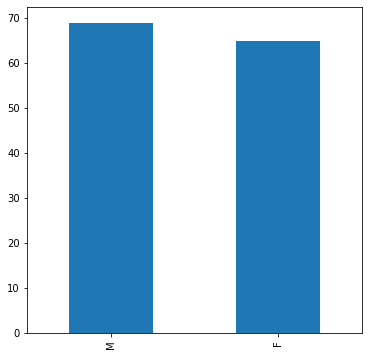

In [22]:
plt.figure(figsize=(6,6))
data[data.Infiltration ==1]['Patient Gender'].value_counts().plot(kind='bar')

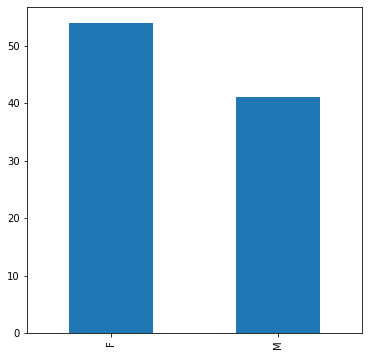

In [23]:
plt.figure(figsize=(6,6))
data[data.Effusion ==1]['Patient Gender'].value_counts().plot(kind='bar');

Gender distribution seems to be pretty equal in the whole population as well as with Infiltration, with a slight preference towards females in the Effusion distribution. 

### Finally, look at if and how age & gender relate to mass size in individuals who have a mass as a finding:

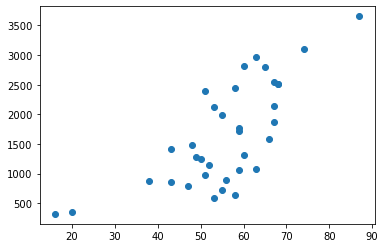

In [24]:
plt.scatter(data['Patient Age'], data['Mass_Size'])

In [27]:
mass_sizes = data['Mass_Size'].values

In [32]:
np.where(~np.isnan(mass_sizes))

(array([  4,  10,  17,  44,  46,  66, 101, 107, 113, 184, 185, 214, 220,
        266, 273, 275, 282, 296, 345, 352, 390, 466, 518, 588, 675, 706,
        774, 795, 867, 871, 918, 928, 929, 942, 995], dtype=int64),)

In [34]:
mass_sizes = data['Mass_Size'].values
mass_inds = np.where(~np.isnan(mass_sizes))
ages = data.iloc[mass_inds]['Patient Age']
mass_sizes=mass_sizes[mass_inds]
scipy.stats.pearsonr(mass_sizes,ages)

(0.727566330004357, 7.354553889322061e-07)

The above tells us that age and mass size are significantly correlated, with a Pearson's coerrelation coefficient of 0.727

In [35]:
np.mean(data[data['Patient Gender']== 'M']['Mass_Size'])

1735.7

In [37]:
np.mean(data[data['Patient Gender']== 'F']['Mass_Size'])

1550.8

In [39]:
scipy.stats.ttest_ind(data[data['Patient Gender']== 'F']['Mass_Size'], data[data['Patient Gender']== 'M']['Mass_Size'],nan_policy='omit')

Ttest_indResult(statistic=-0.6188395721019645, pvalue=0.5402707532656862)

The above tells us that there is no statistically significant difference between mass size with gender.